# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#inputing

from sklearn.impute import KNNImputer

#dataset division

from sklearn.model_selection import train_test_split

#Scalers and evaluation method

from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

#Lasso Regression
from sklearn.linear_model import LassoCV

#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

#MLP Classifier
from sklearn.neural_network import MLPClassifier

#Chi_square

import scipy.stats as stats
from scipy.stats import chi2_contingency

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("Project_train_dataset.csv")
train.set_index("Student ID", inplace = True)
train.head()

,Program,Student Gender,Experience Level,Student Siblings,Student Family,Financial Background,School Dormitory,School of Origin,Student Social Influence,Favourite Study Element,Admitted in School
Student ID,,,,,,,,,,,
1,Sorcery School,male,22.0,1,0,7.2500,NaN,Mystic Academy,18,Fire,0
2,Magi Academy,female,38.0,1,0,71.2833,Cottage Chamber,Eldertree Enclave,7,Fire,1
3,Sorcery School,female,26.0,0,0,7.9250,NaN,Mystic Academy,12,Air,1
5,Sorcery School,male,35.0,0,0,8.0500,NaN,Mystic Academy,12,Air,0
6,Sorcery School,male,NaN,0,0,8.4583,NaN,Arcan Institute,11,Earth,0


In [3]:
train.describe()

,Experience Level,Student Siblings,Student Family,Financial Background,Student Social Influence,Admitted in School
count,567.000000,713.000000,713.000000,713.000000,713.000000,713.000000
mean,29.890952,0.521739,0.354839,31.327238,12.719495,0.353436
std,14.599272,1.057287,0.770985,50.903034,6.949648,0.478372
min,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,20.750000,0.000000,0.000000,7.925000,7.000000,0.000000
50%,28.000000,0.000000,0.000000,14.400000,13.000000,0.000000
75%,39.000000,1.000000,0.000000,30.000000,19.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,24.000000,1.000000


In [4]:
train.describe(include = "O")

,Program,Student Gender,School Dormitory,School of Origin,Favourite Study Element
count,713,713,153,713,713
unique,3,2,6,3,4
top,Sorcery School,male,Mystical Chamber,Mystic Academy,Earth
freq,391,469,51,524,184


In [5]:
train.isna().sum()

Program                       0
Student Gender                0
Experience Level            146
Student Siblings              0
Student Family                0
Financial Background          0
School Dormitory            560
School of Origin              0
Student Social Influence      0
Favourite Study Element       0
Admitted in School            0
dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 713 entries, 1 to 889
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Program                   713 non-null    object 
 1   Student Gender            713 non-null    object 
 2   Experience Level          567 non-null    float64
 3   Student Siblings          713 non-null    int64  
 4   Student Family            713 non-null    int64  
 5   Financial Background      713 non-null    float64
 6   School Dormitory          153 non-null    object 
 7   School of Origin          713 non-null    object 
 8   Student Social Influence  713 non-null    int64  
 9   Favourite Study Element   713 non-null    object 
 10  Admitted in School        713 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


In [7]:
1-173/713

0.7573632538569425

## Conclusion 1

As the column "School Dormitory" has more than 70% missing values (has 76%) then we can drop this variable according to the rule of thumb as can be seen in https://medium.com/@danberdov/dealing-with-missing-data-8b71cd819501

In [8]:
train1 = train.drop(columns = "School Dormitory")
train1.head()

,Program,Student Gender,Experience Level,Student Siblings,Student Family,Financial Background,School of Origin,Student Social Influence,Favourite Study Element,Admitted in School
Student ID,,,,,,,,,,
1,Sorcery School,male,22.0,1,0,7.2500,Mystic Academy,18,Fire,0
2,Magi Academy,female,38.0,1,0,71.2833,Eldertree Enclave,7,Fire,1
3,Sorcery School,female,26.0,0,0,7.9250,Mystic Academy,12,Air,1
5,Sorcery School,male,35.0,0,0,8.0500,Mystic Academy,12,Air,0
6,Sorcery School,male,NaN,0,0,8.4583,Arcan Institute,11,Earth,0


# Test Dataset

In [9]:
test = pd.read_csv("Project_test_dataset.csv", index_col = 0)

In [10]:
test.isna().sum()

Program                       0
Student Gender                0
Experience Level             31
Student Siblings              0
Student Family                0
Financial Background          0
School Dormitory            127
School of Origin              0
Student Social Influence      0
Favourite Study Element       0
dtype: int64

In [11]:
test = test.drop(columns = "School Dormitory")

# Feature selection for categorical data

In [12]:
X_2 = train1.drop(columns = "Admitted in School")
y_2 = train1["Admitted in School"]

In [13]:
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_2,
                                                  y_2,
                                                  train_size = 0.70,
                                                  random_state = 15,
                                                  stratify = y_2
                                                  
)

We divided the dataset into 70% for the trainning and 30% for validation using a random state 15

In [14]:
train_cat = X_train_2.drop(columns = ["Experience Level", "Student Siblings", "Student Family", "Financial Background", "Student Social Influence"])

In [15]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [17]:
for var in train_cat:
    TestIndependence(train_cat[var],y_train_2, var)

Program is IMPORTANT for Prediction
Student Gender is IMPORTANT for Prediction
School of Origin is IMPORTANT for Prediction
Favourite Study Element is NOT an important predictor. (Discard Favourite Study Element from model)


<hr>


### Categorical Data

| Predictor | Chi-Square | 
| --- | --- | 
| Program | Keep |  
| Student Gender | Keep | 
| School of Origin | Keep|
| Favourite Study Element | Discard | 

<hr>

In [18]:
train = train1.drop(columns = "Favourite Study Element")
test = test.drop(columns = "Favourite Study Element")

## Convert all variables to numeric ones

In [20]:
train_2 = pd.get_dummies(data = train, prefix = "", prefix_sep = "")
train_2.head()

,Experience Level,Student Siblings,Student Family,Financial Background,Student Social Influence,Admitted in School,Magi Academy,Sorcery School,Witchcraft Institute,female,male,Arcan Institute,Eldertree Enclave,Mystic Academy
Student ID,,,,,,,,,,,,,,
1,22.0,1,0,7.2500,18,0,False,True,False,False,True,False,False,True
2,38.0,1,0,71.2833,7,1,True,False,False,True,False,False,True,False
3,26.0,0,0,7.9250,12,1,False,True,False,True,False,False,False,True
5,35.0,0,0,8.0500,12,0,False,True,False,False,True,False,False,True
6,NaN,0,0,8.4583,11,0,False,True,False,False,True,True,False,False


In [21]:
train_2.columns

Index(['Experience Level', 'Student Siblings', 'Student Family',
       'Financial Background', 'Student Social Influence',
       'Admitted in School', 'Magi Academy', 'Sorcery School',
       'Witchcraft Institute', 'female', 'male', 'Arcan Institute ',
       'Eldertree Enclave', 'Mystic Academy'],
      dtype='object')

In [22]:
train_2 = train_2[['Sorcery School', 'Magi Academy', "male", "Experience Level", "Student Siblings", "Student Family", "Financial Background", 'Mystic Academy', 'Eldertree Enclave', "Student Social Influence", "Admitted in School"]]
train_2.head()

,Sorcery School,Magi Academy,male,Experience Level,Student Siblings,Student Family,Financial Background,Mystic Academy,Eldertree Enclave,Student Social Influence,Admitted in School
Student ID,,,,,,,,,,,
1,True,False,True,22.0,1,0,7.2500,True,False,18,0
2,False,True,False,38.0,1,0,71.2833,False,True,7,1
3,True,False,False,26.0,0,0,7.9250,True,False,12,1
5,True,False,True,35.0,0,0,8.0500,True,False,12,0
6,True,False,True,NaN,0,0,8.4583,False,False,11,0


This version of the dataset will have the dummy variables being "Arcan Institute", "female", "Witchcraft Institute", "Water" all dropped as when you have dummy variables you only need to have n-1 new columns (n being the number of unique values on the original columns)

Now we do the same but for the test

In [23]:
test= pd.get_dummies(data = test, prefix = "", prefix_sep = "")
test.head()

,Experience Level,Student Siblings,Student Family,Financial Background,Student Social Influence,Magi Academy,Sorcery School,Witchcraft Institute,female,male,Arcan Institute,Eldertree Enclave,Mystic Academy
Student ID,,,,,,,,,,,,,
836,39.0,1,1,83.1583,16,True,False,False,True,False,False,True,False
323,30.0,0,0,12.3500,1,False,False,True,True,False,True,False,False
117,70.5,0,0,7.7500,9,False,True,False,False,True,True,False,False
444,28.0,0,0,13.0000,9,False,False,True,True,False,False,False,True
619,4.0,2,1,39.0000,8,False,False,True,True,False,False,False,True


In [24]:
test = test[['Sorcery School', 'Magi Academy', "male", "Experience Level", "Student Siblings", "Student Family", "Financial Background", 'Mystic Academy', 'Eldertree Enclave', "Student Social Influence"]]

## Impute the other missing values

In [25]:
imputer = KNNImputer(n_neighbors = 5, weights = "distance").fit(train_2)

As this is a small dataset, usually the best n for this kind is either 3, 5 or 7

In [26]:
train_inputed = imputer.transform(train_2)

In [27]:
train_inputed1 = pd.DataFrame(train_inputed, columns = train_2.columns, index = train_2.index)
train_inputed1.head()

,Sorcery School,Magi Academy,male,Experience Level,Student Siblings,Student Family,Financial Background,Mystic Academy,Eldertree Enclave,Student Social Influence,Admitted in School
Student ID,,,,,,,,,,,
1,1.0,0.0,1.0,22.000000,1.0,0.0,7.2500,1.0,0.0,18.0,0.0
2,0.0,1.0,0.0,38.000000,1.0,0.0,71.2833,0.0,1.0,7.0,1.0
3,1.0,0.0,0.0,26.000000,0.0,0.0,7.9250,1.0,0.0,12.0,1.0
5,1.0,0.0,1.0,35.000000,0.0,0.0,8.0500,1.0,0.0,12.0,0.0
6,1.0,0.0,1.0,21.950472,0.0,0.0,8.4583,0.0,0.0,11.0,0.0


Now for the test dataset

In [28]:
imputer = KNNImputer(n_neighbors = 5, weights = "distance").fit(train_2.drop(columns = "Admitted in School"))

In [29]:
test_inputed = imputer.transform(test)

In [30]:
test= pd.DataFrame(test_inputed, columns = test.columns, index = test.index)
test.head()

,Sorcery School,Magi Academy,male,Experience Level,Student Siblings,Student Family,Financial Background,Mystic Academy,Eldertree Enclave,Student Social Influence
Student ID,,,,,,,,,,
836,0.0,1.0,0.0,39.0,1.0,1.0,83.1583,0.0,1.0,16.0
323,0.0,0.0,0.0,30.0,0.0,0.0,12.3500,0.0,0.0,1.0
117,1.0,0.0,1.0,70.5,0.0,0.0,7.7500,0.0,0.0,9.0
444,0.0,0.0,0.0,28.0,0.0,0.0,13.0000,1.0,0.0,9.0
619,0.0,0.0,0.0,4.0,2.0,1.0,39.0000,1.0,0.0,8.0


# Division of the dataset

In [31]:
x = train_inputed1.drop(columns = "Admitted in School")
y = train_inputed1[["Admitted in School"]]

In [32]:
X_train, X_val, y_train, y_val =  train_test_split(x,
                                                  y,
                                                  train_size = 0.70,
                                                  random_state = 15,
                                                  stratify = y)

The same division as the previous now just without the dropped previously variable

# Feature Scaling

In [48]:
model_basic =  MLPClassifier(random_state=6).fit(X_train,y_train)
score_basic = model_basic.score(X_val,y_val)
score_basic

0.7663551401869159

In [49]:
min_max = MinMaxScaler().fit(X_train)
min_max_X_train = min_max.transform(X_train)
min_max_X_val = min_max.transform(X_val)
model_min_max = MLPClassifier(random_state=6).fit(min_max_X_train,y_train)
score_minmax = model_min_max.score(min_max_X_val,y_val)
score_minmax

0.8037383177570093

In [50]:
min_max1 = MinMaxScaler(feature_range = (-1,1)).fit(X_train)
min_max1_X_train = min_max1.transform(X_train)
min_max1_X_val = min_max1.transform(X_val)
model_min_max1 = MLPClassifier(random_state=6).fit(min_max1_X_train,y_train)
score_minmax1 = model_min_max1.score(min_max1_X_val,y_val)
score_minmax1

0.8130841121495327

In [51]:
st = StandardScaler().fit(X_train)
st_X_train = st.transform(X_train)
st_X_val = st.transform(X_val)
model_st = MLPClassifier(random_state=6).fit(st_X_train,y_train)
score_st = model_st.score(st_X_val,y_val)
score_st

0.780373831775701

In [52]:
rob = RobustScaler().fit(X_train)
rob_X_train = rob.transform(X_train)
rob_X_val = rob.transform(X_val)
model_rob = MLPClassifier(random_state=6).fit(rob_X_train,y_train)
score_rob = model_st.score(rob_X_val,y_val)
score_rob

0.7523364485981309

<Axes: >

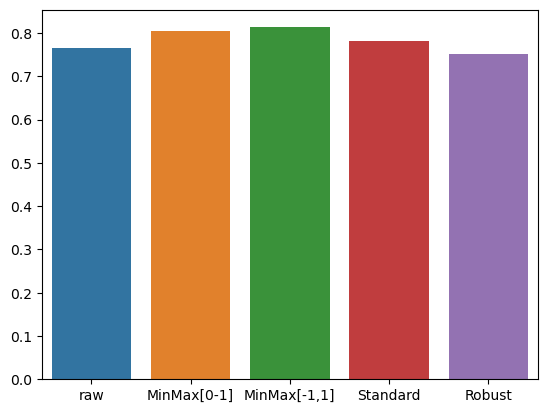

In [59]:
x = ['raw','MinMax[0-1]','MinMax[-1,1]','Standard','Robust']
y = [score_basic, score_minmax, score_minmax1, score_st, score_rob]


sns.barplot(x = x, y = y)

So we conclude that the MinMaxScaller with feature_range = (-1,1) is the best way to scale the features

In [60]:
choice_scaler = MinMaxScaler(feature_range = (-1,1)).fit(X_train)

In [61]:
X_train_mm = choice_scaler.transform(X_train)
X_train_mm = pd.DataFrame(X_train_mm, columns = X_train.columns).set_index(X_train.index)
X_train_mm.head(3)

,Sorcery School,Magi Academy,male,Experience Level,Student Siblings,Student Family,Financial Background,Mystic Academy,Eldertree Enclave,Student Social Influence
Student ID,,,,,,,,,,
142,1.0,-1.0,-1.0,-0.457653,-1.0,-1.0,-0.969746,1.0,-1.0,0.304348
399,-1.0,-1.0,1.0,-0.432521,-1.0,-1.0,-0.959011,1.0,-1.0,-0.652174
849,-1.0,-1.0,1.0,-0.306861,-1.0,-0.6,-0.871177,1.0,-1.0,1.000000


In [62]:
X_val_mm = choice_scaler.transform(X_val)
X_val_mm = pd.DataFrame(X_val_mm, columns = X_val.columns).set_index(X_val.index)
X_val_mm.head(3)

,Sorcery School,Magi Academy,male,Experience Level,Student Siblings,Student Family,Financial Background,Mystic Academy,Eldertree Enclave,Student Social Influence
Student ID,,,,,,,,,,
734,-1.0,-1.0,1.0,-0.432521,-1.00,-1.0,-0.949251,1.0,-1.0,1.000000
803,-1.0,1.0,1.0,-0.734104,-0.75,-0.2,-0.531551,1.0,-1.0,-0.217391
634,-1.0,1.0,1.0,-0.159706,-1.00,-1.0,-1.000000,1.0,-1.0,1.000000


Now for the test dataset

In [63]:
test_mm = choice_scaler.transform(test)
test_mm = pd.DataFrame(test_mm, columns = test.columns).set_index(test.index)
test_mm.head(3)

,Sorcery School,Magi Academy,male,Experience Level,Student Siblings,Student Family,Financial Background,Mystic Academy,Eldertree Enclave,Student Social Influence
Student ID,,,,,,,,,,
836,-1.0,1.0,-1.0,-0.030410,-0.75,-0.6,-0.675372,-1.0,1.0,0.304348
323,-1.0,-1.0,-1.0,-0.256597,-1.00,-1.0,-0.951789,-1.0,-1.0,-1.000000
117,1.0,-1.0,1.0,0.761247,-1.00,-1.0,-0.969746,-1.0,-1.0,-0.304348


# Feature selection 

## Univariate variables

In [65]:
X_train_mm.var()

Sorcery School              0.995243
Magi Academy                0.693242
male                        0.895091
Experience Level            0.111675
Student Siblings            0.060076
Student Family              0.083248
Financial Background        0.031567
Mystic Academy              0.798287
Eldertree Enclave           0.627665
Student Social Influence    0.362603
dtype: float64

As no variable is univariate we keep all for now

## Spearman Correlation

In [66]:
#Join x and y train to see the correlation of all variables betweeen eachother and with the target also
all_train = X_train_mm.join(y_train)
all_train.head()

,Sorcery School,Magi Academy,male,Experience Level,Student Siblings,Student Family,Financial Background,Mystic Academy,Eldertree Enclave,Student Social Influence,Admitted in School
Student ID,,,,,,,,,,,
142,1.0,-1.0,-1.0,-0.457653,-1.0,-1.0,-0.969746,1.0,-1.0,0.304348,1.0
399,-1.0,-1.0,1.0,-0.432521,-1.0,-1.0,-0.959011,1.0,-1.0,-0.652174,0.0
849,-1.0,-1.0,1.0,-0.306861,-1.0,-0.6,-0.871177,1.0,-1.0,1.000000,0.0
522,1.0,-1.0,1.0,-0.457653,-1.0,-1.0,-0.969177,1.0,-1.0,-0.913043,0.0
681,1.0,-1.0,-1.0,-0.284402,-1.0,-1.0,-0.968233,-1.0,-1.0,0.913043,0.0


In [67]:
corr_all_train = all_train.corr(method = "spearman")

In [68]:
corr_all_train

,Sorcery School,Magi Academy,male,Experience Level,Student Siblings,Student Family,Financial Background,Mystic Academy,Eldertree Enclave,Student Social Influence,Admitted in School
Sorcery School,1.000000,-0.580777,0.135325,-0.299661,-0.045028,-0.016659,-0.611693,-0.025878,-0.126879,-0.047075,-0.304942
Magi Academy,-0.580777,1.000000,-0.098186,0.320990,0.010088,-0.026920,0.622069,-0.156829,0.260856,0.007517,0.250603
male,0.135325,-0.098186,1.000000,0.088009,-0.202191,-0.238500,-0.263951,0.103342,-0.100116,-0.021954,-0.574624
Experience Level,-0.299661,0.320990,0.088009,1.000000,-0.157023,-0.244107,0.136347,0.043478,-0.027497,0.031030,-0.071318
Student Siblings,-0.045028,0.010088,-0.202191,-0.157023,1.000000,0.480444,0.457908,0.022963,0.005674,0.010752,0.074007
Student Family,-0.016659,-0.026920,-0.238500,-0.244107,0.480444,1.000000,0.380926,0.050236,0.005533,0.052373,0.137458
Financial Background,-0.611693,0.622069,-0.263951,0.136347,0.457908,0.380926,1.000000,-0.013750,0.170877,0.072481,0.310550
Mystic Academy,-0.025878,-0.156829,0.103342,0.043478,0.022963,0.050236,-0.013750,1.000000,-0.798485,-0.109198,-0.119159
Eldertree Enclave,-0.126879,0.260856,-0.100116,-0.027497,0.005674,0.005533,0.170877,-0.798485,1.000000,0.135712,0.156726
Student Social Influence,-0.047075,0.007517,-0.021954,0.031030,0.010752,0.052373,0.072481,-0.109198,0.135712,1.000000,0.058698


- There is 3 pairs of variables highly correlated as they have correlation < 0.50:
    - Sorcery School vs Magi Academy
    - Financial Background vs Sorcery School
    - Financial Background vs Magi Academy

We need more information to decide what we will do with these variables
- There is one variable that seems to be highly correlated with the target:
    - Male

## Logistic Regression 

In [74]:
# Number of features
nof_list=np.arange(1,len(X_train_mm.columns))            
high_score=0
# Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression()
    rfe = RFE(model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_mm, y_train)
    X_val_rfe = rfe.transform(X_val_mm)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_val_rfe,y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 9
Score with 9 features: 0.771028


Using the above cell we conclude that we will obtain the best results using 9 variables these variables will be: 

In [75]:
model = LogisticRegression()
rfe = RFE(estimator = model, n_features_to_select = 9)
X_rfe = rfe.fit_transform(X_train_mm, y_train)

In [77]:
X_train_mm.columns

Index(['Sorcery School', 'Magi Academy', 'male', 'Experience Level',
       'Student Siblings', 'Student Family', 'Financial Background',
       'Mystic Academy', 'Eldertree Enclave', 'Student Social Influence'],
      dtype='object')

In [78]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True])

These variables will be `Sorcery School`, `Magi Academy`, `male`, `Experience Level`, `Student Siblings`, `Student Family`, `Financial Background`, `Eldertree Enclave`, `Student Social Influence`

## Lasso Regression

In [79]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [80]:
reg = LassoCV()
X_reg = reg.fit(X_train_mm, y_train)

In [81]:
coef = pd.Series(reg.coef_, index = X_train_mm.columns)
coef

Sorcery School             -0.092844
Magi Academy                0.070018
male                       -0.264786
Experience Level           -0.225040
Student Siblings           -0.168848
Student Family             -0.000000
Financial Background        0.006608
Mystic Academy             -0.008749
Eldertree Enclave           0.009150
Student Social Influence    0.022553
dtype: float64

In [82]:
coef == 0

Sorcery School              False
Magi Academy                False
male                        False
Experience Level            False
Student Siblings            False
Student Family               True
Financial Background        False
Mystic Academy              False
Eldertree Enclave           False
Student Social Influence    False
dtype: bool

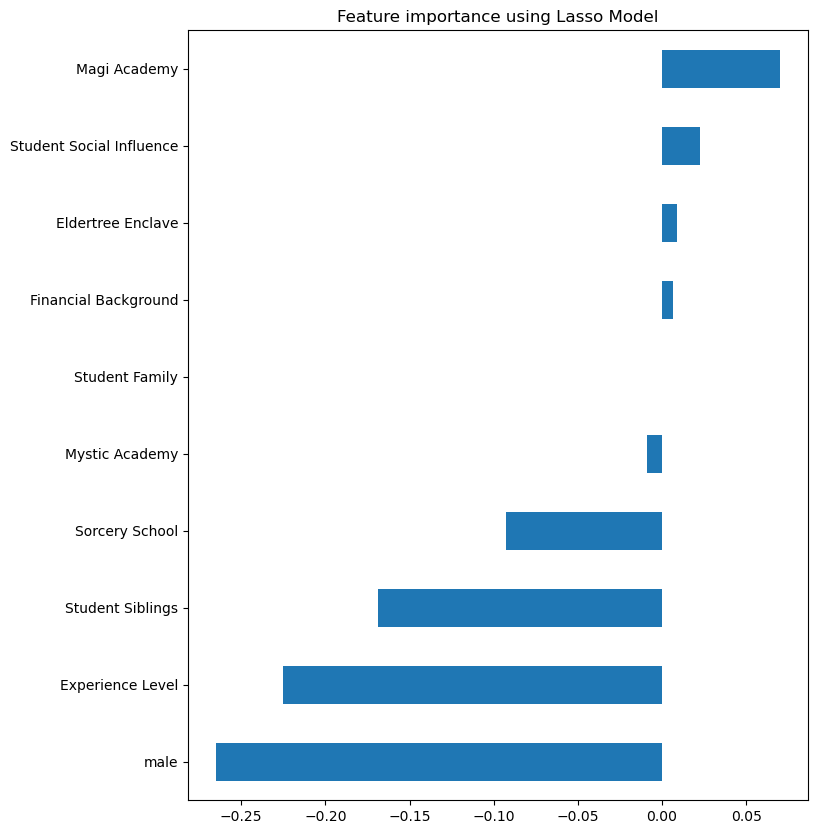

In [83]:
plot_importance(coef,'Lasso')

According to Lasso, all variables seem good predictors except to Student Family. Eldertree Enclave, Financial Background and Mystic Academy are doubtful

# Decision Tree Classifier

In [84]:
gini_importance = DecisionTreeClassifier().fit(X_train_mm, y_train).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(X_train_mm, y_train).feature_importances_

<Axes: xlabel='Value', ylabel='Col'>

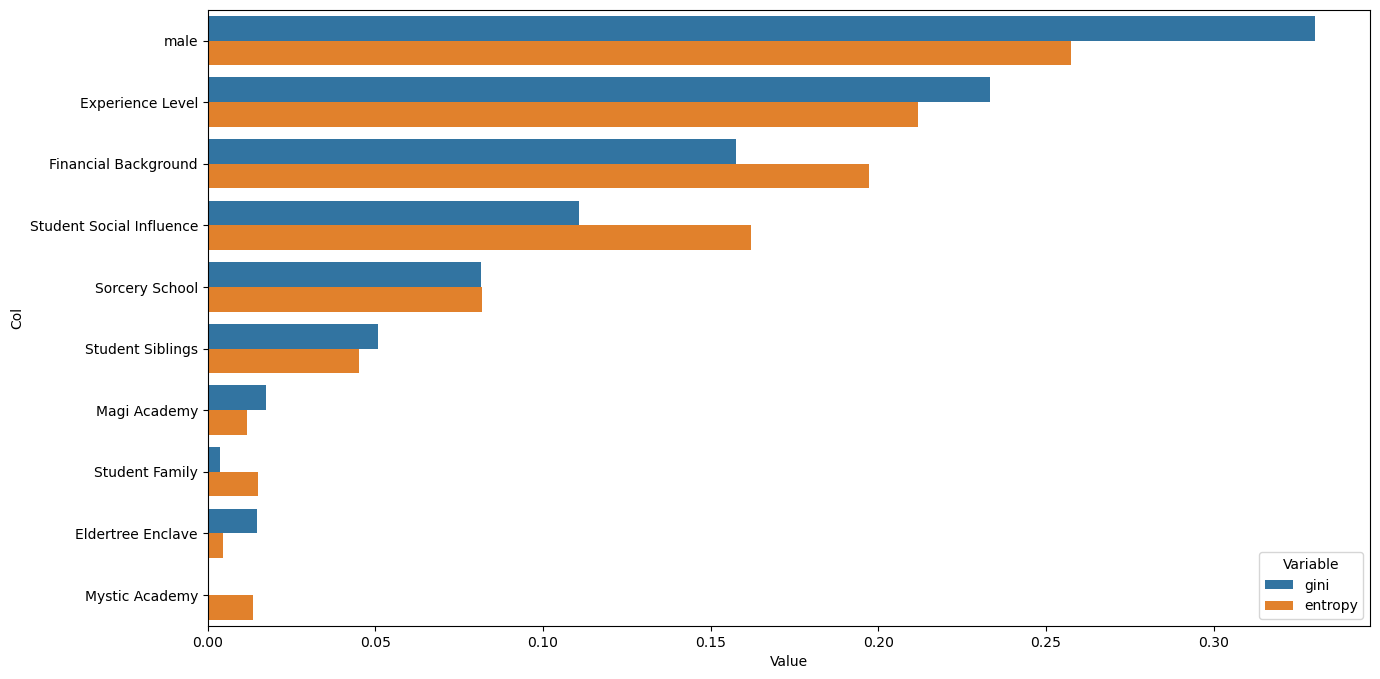

In [86]:
zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = X_train_mm.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

According to the decision tree all variables seem good estimator although `Students Family`, `Mystic Academy`, `Eldertree Enclave` and `Magi Academy` are the weaker ones

In [87]:
X_train_mm.columns

Index(['Sorcery School', 'Magi Academy', 'male', 'Experience Level',
       'Student Siblings', 'Student Family', 'Financial Background',
       'Mystic Academy', 'Eldertree Enclave', 'Student Social Influence'],
      dtype='object')

### Conclusions for numerical data

<hr>


#### Numerical Data

| Predictor | Spearman Correlation | Logistic Regression | Lasso Regression | Decision Tree Classifier | Final Decision
| --- | --- | --- | --- | --- | --- |
| Experience Level | Discard | Keep | Keep | Keep | Keep |
| Student Siblings | Discard | Keep | Keep | Keep | Keep |
| Student Family | Discard | Keep | Discard | Keep? | Discard |
| Financial Background | Discard | Keep | Keep? | Keep | Keep |
| Student Social Influence | Discard | Keep | Keep | Keep | Keep |
| Sorcery School | Discard | Keep | Keep | Keep  | Keep |
| Magi Academy | Discard | Keep | Keep | Keep? | Keep |
| Male | Keep | Keep | Keep | Keep  | Keep |
| Mystic Academy | Discard | Discard | Keep? | Keep? | Discard |
| Eldertree Enclave | Discard | Keep | Keep? | Keep? | Keep |

<hr>

# Exporting the datasets

In [88]:
new_train_all_mm = X_train_mm.join(y_train)

In [89]:
new_train_all_mm = new_train_all_mm.drop(columns = ["Student Family", "Mystic Academy"])

In [90]:
new_train_all_mm.head()

,Sorcery School,Magi Academy,male,Experience Level,Student Siblings,Financial Background,Eldertree Enclave,Student Social Influence,Admitted in School
Student ID,,,,,,,,,
142,1.0,-1.0,-1.0,-0.457653,-1.0,-0.969746,-1.0,0.304348,1.0
399,-1.0,-1.0,1.0,-0.432521,-1.0,-0.959011,-1.0,-0.652174,0.0
849,-1.0,-1.0,1.0,-0.306861,-1.0,-0.871177,-1.0,1.000000,0.0
522,1.0,-1.0,1.0,-0.457653,-1.0,-0.969177,-1.0,-0.913043,0.0
681,1.0,-1.0,-1.0,-0.284402,-1.0,-0.968233,-1.0,0.913043,0.0


In [91]:
new_val_all_mm = X_val_mm.join(y_val)

In [92]:
new_val_all_mm = new_val_all_mm.drop(columns = ["Student Family", "Mystic Academy"])

In [94]:
new_train_all_mm.to_csv("Data_after_feature_selection/train_data_scalled.csv")

In [95]:
new_val_all_mm.to_csv("Data_after_feature_selection/val_data_scalled.csv")

Now for the test dataset

In [97]:
test = test_mm.drop(columns = ["Student Family", "Mystic Academy"])

In [98]:
test.head()

,Sorcery School,Magi Academy,male,Experience Level,Student Siblings,Financial Background,Eldertree Enclave,Student Social Influence
Student ID,,,,,,,,
836,-1.0,1.0,-1.0,-0.030410,-0.75,-0.675372,1.0,0.304348
323,-1.0,-1.0,-1.0,-0.256597,-1.00,-0.951789,-1.0,-1.000000
117,1.0,-1.0,1.0,0.761247,-1.00,-0.969746,-1.0,-0.304348
444,-1.0,-1.0,-1.0,-0.306861,-1.00,-0.949251,-1.0,-0.304348
619,-1.0,-1.0,-1.0,-0.910028,-0.50,-0.847754,-1.0,-0.391304


In [99]:
test.to_csv("Data_after_feature_selection/test_data_scalled.csv")